# CODE FROM SCRATCH

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
D = np.array([[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1],
                 [2.4, 0.7, 2.9, 2.2, 3, 2.7, 1.6, 1.1, 1.6, 0.9]]).T
D

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

Data của file là $X \in R^{n * N}$: <br>
$\hspace{1cm}\bullet \hspace{0.5cm} n $ (số hàng) là số lượng sample của dataset. <br>
$\hspace{1cm}\bullet \hspace{0.5cm} N $ (số cột) là số lượng feature của dataset. <br>

In [4]:
n = D.shape[0]
N = D.shape[1]
print("Số lượng sample là: ", n)
print("Số lượng feature là: ", N)

Số lượng sample là:  10
Số lượng feature là:  2


Tính trung bình cho từng chiều dữ liệu

In [5]:
mean = meanX, meanY = np.mean(D, axis=0)
meanX, meanY

(1.81, 1.9100000000000001)

Chuẩn hóa dữ liệu

In [8]:
Dnew = D - mean
# Dnew = Dnew / np.std(D, axis=0)
Dnew

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

Visualize dữ liệu gốc - D

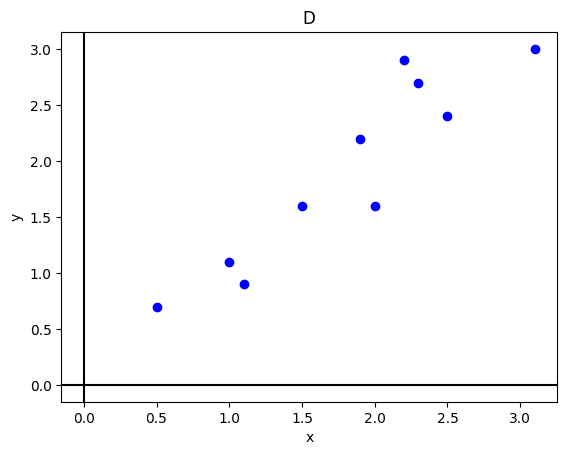

In [6]:
plt.scatter(D[:, 0], D[:, 1], color='blue', marker='o')

plt.title('D')
plt.xlabel('x')
plt.ylabel('y')

plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')

plt.show()

Visualize dữ liệu được chuẩn hóa

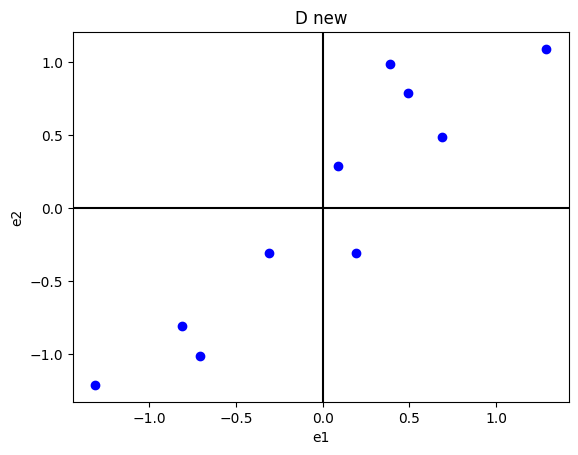

In [9]:
plt.scatter(Dnew[:, 0], Dnew[:, 1], color='blue', marker='o')

plt.title('D new')
plt.xlabel('e1')
plt.ylabel('e2')

plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')

plt.show()

Tính ma trận hiệp phương sai

In [8]:
cov = np.dot(Dnew.T, Dnew) / (n - 1)
cov

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

Tính ma trận hiệp phương sai cho $D_{new}$ <br>
Lưu ý: $cov(D_{new}) \in R ^ {N * N}$ với $N$ là số feature của dataset. <br>
Đưa ma trận vào hàm $np.cov$ đảm bảo ma trận kích thước $feature * samples$

In [12]:
covMatrix = np.cov(Dnew.T, ddof=1)
covMatrix

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

Tính giá trị riêng và vector riêng của ma trận hiệp phương sai covMatrix

In [13]:
eigenValues, eigenVectors = np.linalg.eig(covMatrix)
print("Giá trị riêng của ma trận hiệp phương sai: \n", eigenValues)
print("Vector riêng của ma trận hiệp phương sai: \n", eigenVectors)


Giá trị riêng của ma trận hiệp phương sai: 
 [0.0490834  1.28402771]
Vector riêng của ma trận hiệp phương sai: 
 [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


Do muốn giảm xuống còn 1 chiều, nên ta chỉ chọn 1 cột trong các giá trị riêng (eigenVectors). <br>
Ở đây chọn cột 2, vì giá trị riêng ứng với vector riêng cột 2 lớn hơn cột 1.

In [14]:
selectedEigenVectors = eigenVectors[:, 1]
print(selectedEigenVectors.shape)
selectedEigenVectors

(2,)


array([-0.6778734 , -0.73517866])

Chuyển dữ liệu qua hệ trục tọa độ mới bằng cách nhân ma trận hệ trục mới với dữ liệu được chuẩn hóa. <br>
Ma trận kết quả có kích thước là: (samples * feature) * (feature * số chiều muốn giữ lại)

In [15]:
result = np.dot(Dnew, selectedEigenVectors)
result

array([-0.82797019,  1.77758033, -0.99219749, -0.27421042, -1.67580142,
       -0.9129491 ,  0.09910944,  1.14457216,  0.43804614,  1.22382056])

# CODE BẰNG THƯ VIỆN SKLEARN

In [1]:
import sklearn
from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

c:\Users\mkim\miniconda3\envs\env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\mkim\miniconda3\envs\env\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\mkim\miniconda3\envs\env\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [14]:
D = np.array([[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1],
                 [2.4, 0.7, 2.9, 2.2, 3, 2.7, 1.6, 1.1, 1.6, 0.9]]).T
D

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

Chọn số chiều muốn giữ lại = 1

In [15]:
pca = PCA(n_components=1) # n_components số chiều muốn giữu lại

In [16]:
result = pca.fit_transform(D)
result

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])